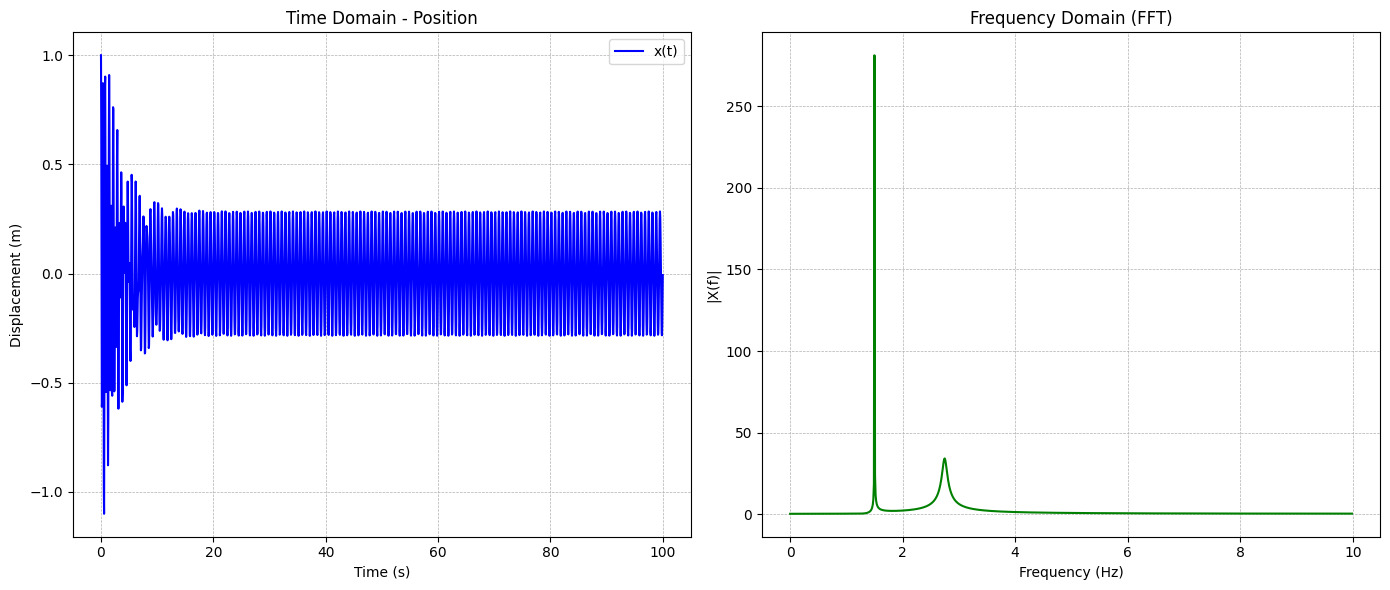

Fourier Transform:  X(f) = \int_{-\infty}^{\infty} x(t) e^{-j 2\pi f t} dt


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
m = 1  # Mass (kg)
k = 300.0  # Spring constant (N/m)
c = 0.5  # Damping coefficient (Ns/m)

# External force as a function of time (example: sinusoidal force)
def external_force(t):
    return 60.0 * np.sin(2 * np.pi * 1.5 * t)  # 1.5 Hz frequency with 60N force

# Equation of motion (Derived using Lagrange method):
# m*x'' + c*x' + k*x = F(t)
# x'' = (-c*x' - k*x + F(t)) / m

def system(t, y):
    x, v = y  # y[0] = x, y[1] = v
    dxdt = v
    dvdt = (-c * v - k * x + external_force(t)) / m
    return np.array([dxdt, dvdt])

# RK4 method
# General form:
# y_{n+1} = y_n + (dt/6) * (k1 + 2k2 + 2k3 + k4)
# k1 = f(t_n, y_n)
# k2 = f(t_n + dt/2, y_n + dt*k1/2)
# k3 = f(t_n + dt/2, y_n + dt*k2/2)
# k4 = f(t_n + dt, y_n + dt*k3)

def rk4(f, y0, t):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0

    for i in range(n - 1):
        dt = t[i + 1] - t[i]
        k1 = f(t[i], y[i])
        k2 = f(t[i] + dt / 2, y[i] + dt * k1 / 2)
        k3 = f(t[i] + dt / 2, y[i] + dt * k2 / 2)
        k4 = f(t[i] + dt, y[i] + dt * k3)

        y[i + 1] = y[i] + dt * (k1 + 2 * k2 + 2 * k3 + k4) / 6

    return y

# Time range
t = np.linspace(0, 100, 2000)  # Higher resolution time range
y0 = [1.0, 0.0]  # Initial conditions (x0 = 1, v0 = 0)

# Solution
sol = rk4(system, y0, t)
x = sol[:, 0]

# FFT computation
# X(f) = \int_{-\infty}^{\infty} x(t) e^{-j 2\pi f t} dt
N = len(t)
dt = t[1] - t[0]
freqs = np.fft.fftfreq(N, dt)
Xf = np.fft.fft(x)

# Plots
plt.figure(figsize=(14, 6))

# Plot time domain and FFT side by side
plt.subplot(1, 2, 1)
plt.plot(t, x, label='x(t)', color='b')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Time Domain - Position')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

plt.subplot(1, 2, 2)
plt.plot(freqs[:N//2], np.abs(Xf[:N//2]), color='g')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|X(f)|')
plt.title('Frequency Domain (FFT)')
plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

# Mathematical representation of FFT
fft_formula = "X(f) = \\int_{-\\infty}^{\\infty} x(t) e^{-j 2\\pi f t} dt"
print("Fourier Transform: ", fft_formula)

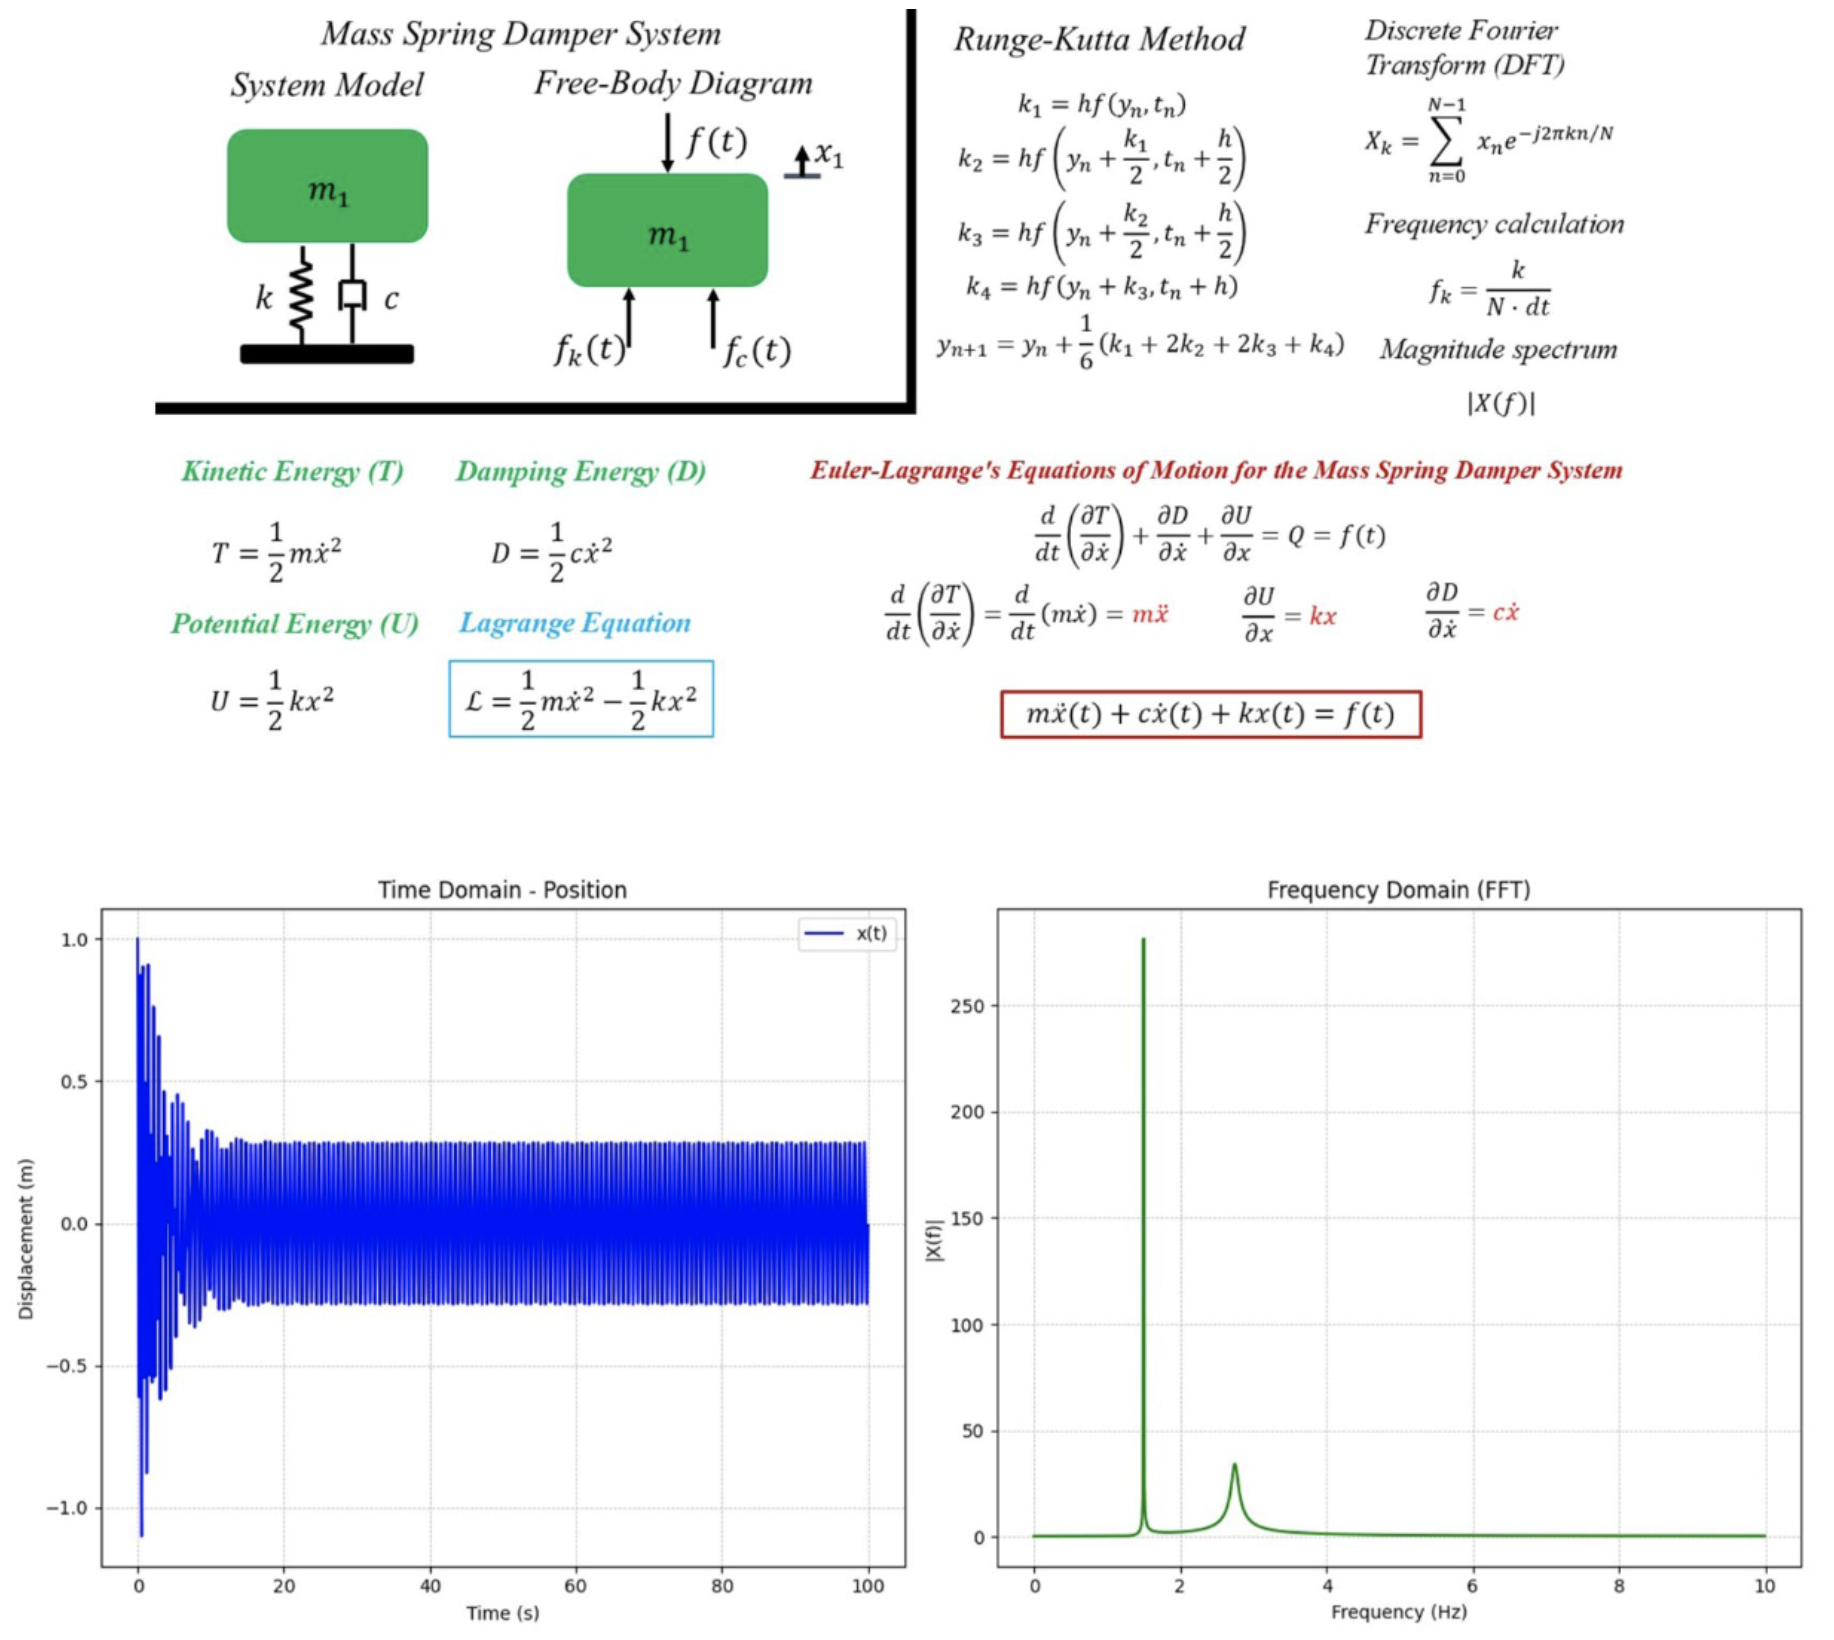